# Analyzing a Fictional Marketing Campaign
The purpose of this small project is to process the data in a csv file, and conduct some analysis on the processed data.

The data being processed here is about a fictional marketing campaign from a datacamp class. The marketing campagin saw different marketing channels (email, facebook, etc) being used and reports their respective outcome of whether the customer subsribed to the service or not.

Despite being a fictional data set, the pre-analysis/cleaning and analysis should be similar to what will be done in industry regardless.


Of course, the data cleaning step here is much more simplified than that compared to a real life setting where the data retreived will be messy, and often with plenty of missing data and NaN values. More complex data cleaning methods will be explored in other projects later down the road - it will not be in the scope of this project; nor is it the main idea.

### Steps for pre-analysis and cleaning
1. Import the file
2. Observe the file and its info
3. Do cleaning if needed

In [1]:
# imports the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the csv file
marketing = pd.read_csv("marketing.csv")

In [3]:
# taking a look at the imported file
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


**Note** the variant column is used to dictate if it was used as a control or manipulated variable in an A/B test

In [5]:
print(marketing[marketing['marketing_channel'].isna()])

        user_id date_served marketing_channel  variant converted  \
9944  a10009231         NaN               NaN  control       NaN   
9945  a10009232         NaN               NaN  control       NaN   
9946  a10009233         NaN               NaN  control       NaN   
9947  a10009234         NaN               NaN  control       NaN   
9948  a10009235         NaN               NaN  control       NaN   
9949  a10009236         NaN               NaN  control       NaN   
9950  a10009237         NaN               NaN  control       NaN   
9951  a10009238         NaN               NaN  control       NaN   
9952  a10009239         NaN               NaN  control       NaN   
9953  a10009240         NaN               NaN  control       NaN   
9954  a10009241         NaN               NaN  control       NaN   
9955  a10009242         NaN               NaN  control       NaN   
9956  a10009243         NaN               NaN  control       NaN   
9957  a10009244         NaN               NaN  c

From the inspection we see when filtering for missing `'marketing_channel'` we see that those rows do not hold any useful info. We can drop these rows. 

In [6]:
# dropping rows where marketing_channel is missing
marketing_dropna = marketing.dropna(subset='marketing_channel')
print(marketing_dropna[marketing_dropna['marketing_channel'].isna()])

Empty DataFrame
Columns: [user_id, date_served, marketing_channel, variant, converted, language_displayed, language_preferred, age_group, date_subscribed, date_canceled, subscribing_channel, is_retained]
Index: []


In [7]:
# overwriting the original marketing variable
marketing = marketing_dropna

It also makes sense for `'date_subscribed'` and `'date_cancelled'` to both have missing values since not all customers will subscribe and only subscribed customers can cancel.

Notice that the dates are not in datetime format; plus they are also not in the "YYYY-MM-DD" form. Changing them will ease analysis later on.

In [8]:
# changing the dates into datetime format
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'])

# let's take a look
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10022 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10022 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10022 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10022 non-null  object        
 6   language_preferred   10022 non-null  object        
 7   age_group            10022 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 1017.9+ KB


Noticed that both `'converted'` and `'is_retained'` both only contain **True** or **False**. These should be converted to boolean instead.

In [9]:
print(marketing['is_retained'].unique())

[True False nan]


In [10]:
print(marketing['converted'].unique())

[True False]


In [11]:
# converting the 'converted' columns into bool
# ignoring 'is_retained' column because converting it to boolean will fill it with values - which is not what we want

marketing['converted'] = marketing['converted'].astype('bool')

print(marketing['converted'].dtype)

bool


Let's take a look at the cleaned set

In [12]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10022 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10022 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10022 non-null  object        
 4   converted            10022 non-null  bool          
 5   language_displayed   10022 non-null  object        
 6   language_preferred   10022 non-null  object        
 7   age_group            10022 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: bool(1), datetime64[ns](3), object(8)
memory usage: 949.3+ KB


Looks good. Now we can doing some analysis

In [13]:
marketing.to_csv("marketing_clean.csv")

### Analysis
Since this is a mock marketing campaign, it makes sense to have a sense to get an idea on how many people are viewing the ads as well as their demographics.

Let's see what's the duration of this dataset

In [14]:
print(marketing['date_served'].min())
print(marketing['date_served'].max())

2018-01-01 00:00:00
2018-01-31 00:00:00


Let's see the number of unique users daily

In [15]:
daily_users = marketing.groupby('date_served')['user_id'].nunique()
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


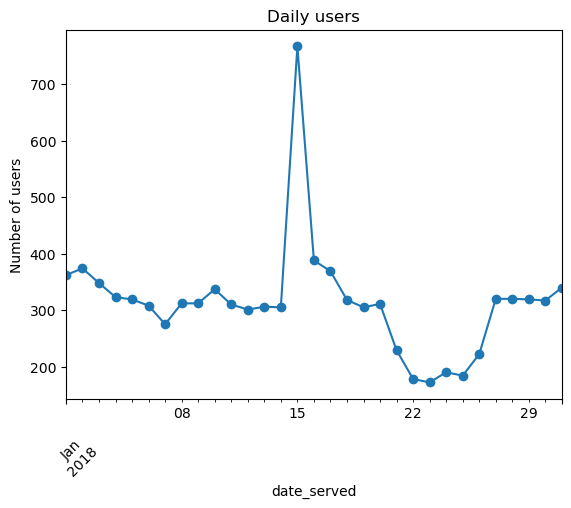

In [16]:
# plotting this so it's easier to get a read
daily_users.plot(kind = 'line', marker='o')

# title, xlabel, ylabel
plt.title('Daily users')
plt.ylabel('Number of users')

# rotating the dates so it's easier to see
plt.xticks(rotation=45)

# show plot
plt.show()

We can see that there's a large number of users on 2018-01-15. Whether or not this is significant is dependent on other factors which are not covered in this dataset. 

For example maybe there was a discount storewide or maybe a new product just launched.

Just for curiosity's sake let's see the spread of different marketing channels and the corresponding users


In [17]:
daily_users_channel = marketing.groupby(['date_served', 'marketing_channel'])['user_id'].nunique()
print(daily_users_channel)

date_served  marketing_channel
2018-01-01   Email                  1
             Facebook              68
             House Ads            189
             Instagram             75
             Push                  36
                                 ... 
2018-01-31   Email                  1
             Facebook              76
             House Ads            157
             Instagram             73
             Push                  38
Name: user_id, Length: 155, dtype: int64


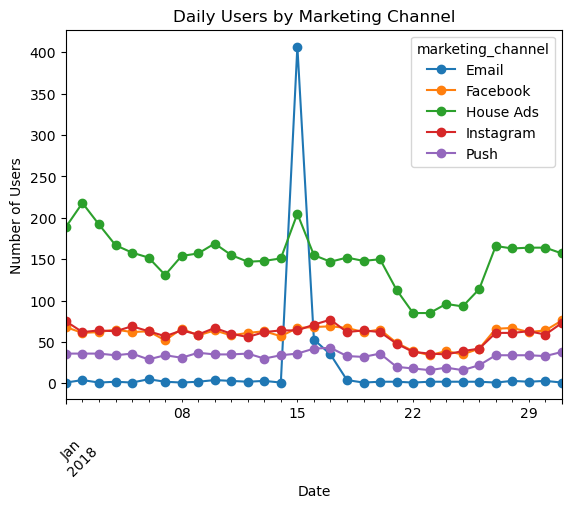

In [18]:
# plotting this series
# Convert the Series to a DataFrame
df = daily_users_channel.reset_index()

# Pivot the DataFrame to have 'date_served' as the index and 'marketing_channel' as columns
pivot_df = df.pivot(index='date_served', columns='marketing_channel', values='user_id')

# Plot the pivoted DataFrame
pivot_df.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Daily Users by Marketing Channel')

plt.xticks(rotation=45)

# Show the plot
plt.show()

We can see that for Push, Facebook, and Instagram the number of users are fairly constant. There's a large uptick for email on 2018-01-15 (the same as the previous graph). This could indicate a mass email campaign or something similar.

Let's see what we can gleam from the age demographics

In [19]:
daily_users_age = marketing.groupby(['date_served', 'age_group'])['user_id'].nunique()
print(daily_users_age)

date_served  age_group  
2018-01-01   0-18 years     58
             19-24 years    61
             24-30 years    57
             30-36 years    49
             36-45 years    47
                            ..
2018-01-31   24-30 years    52
             30-36 years    44
             36-45 years    57
             45-55 years    43
             55+ years      38
Name: user_id, Length: 217, dtype: int64


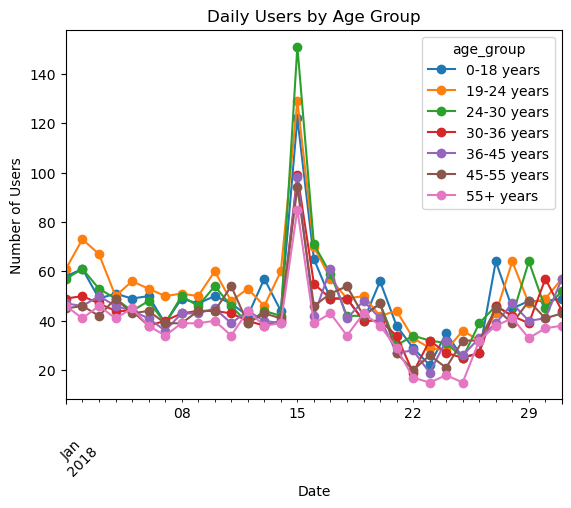

In [20]:
# plotting this series
# Convert the Series to a DataFrame
df = daily_users_age.reset_index()

# Pivot the DataFrame to have 'date_served' as the index and 'marketing_channel' as columns
pivot_df = df.pivot(index='date_served', columns='age_group', values='user_id')

# Plot the pivoted DataFrame
pivot_df.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Daily Users by Age Group')

plt.xticks(rotation=45)

# Show the plot
plt.show()

Quite a messy graph. Might be worth taking a look at each age group individually.

In [21]:
# creating a function to plot the columns in the dataframe into different plots for visibility
def plot_func(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column], marker='o')
        plt.ylim(0)
        
        plt.title('Daily Users from ' + column + ' age group\n')
        plt.ylabel('Number of users')
        plt.xlabel('Date')
        plt.xticks(rotation=45)
        
        plt.show()

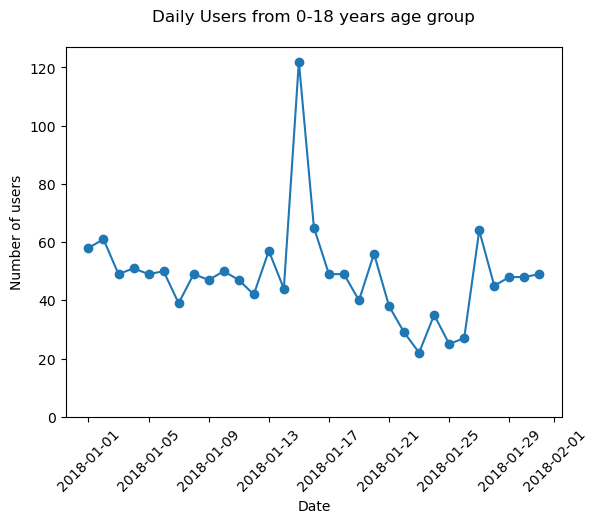

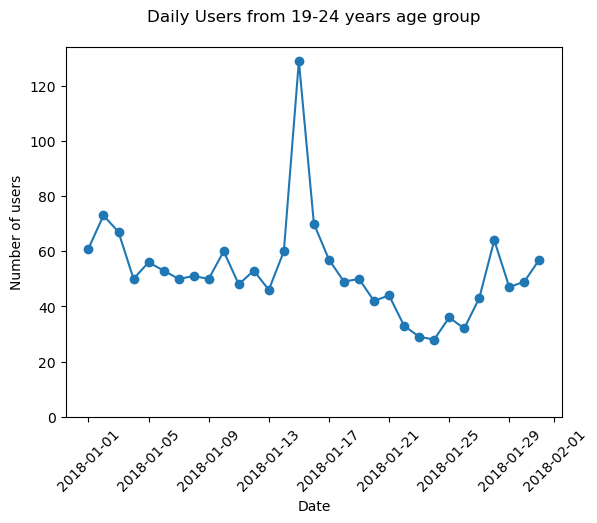

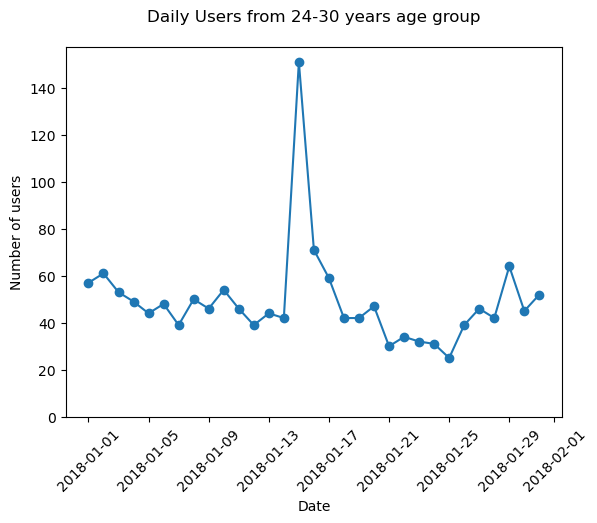

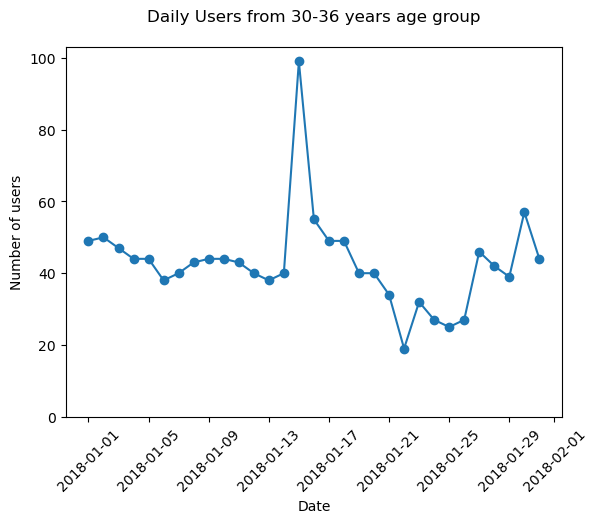

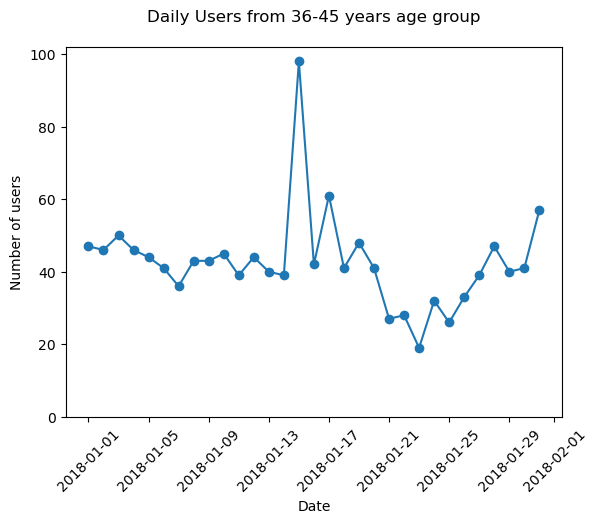

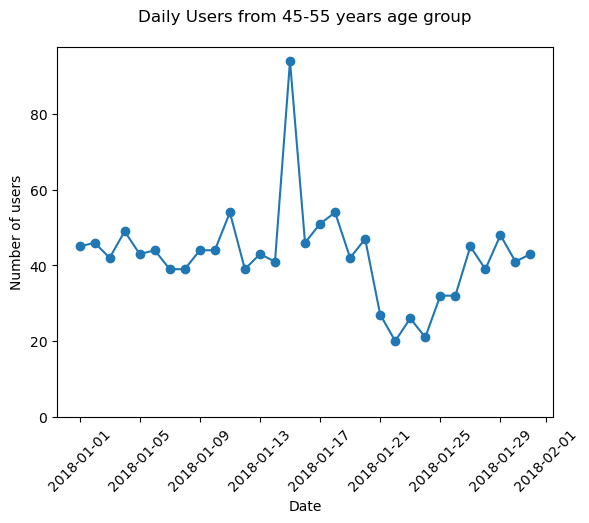

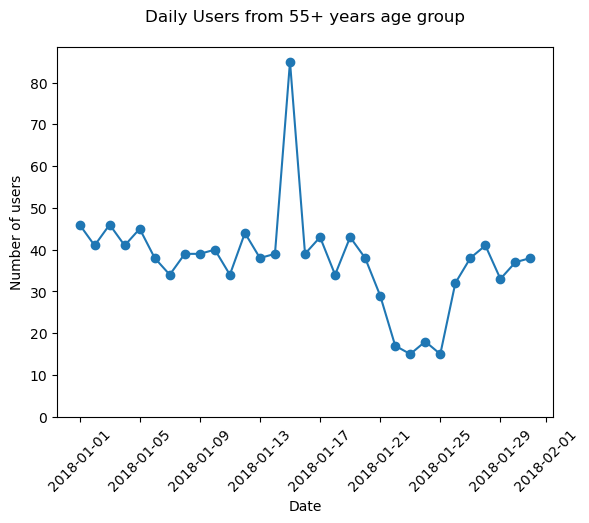

In [22]:
plot_func(pivot_df)

Now we can see the distribution of the different age groups. From a quick glance we can see that there are more active users who are <= 45 years old.

Since we know that email was responsible for the uptick on 2018-01-15. Maybe we can have a look at how each age groups responded to the uptick.

In [23]:
# taking a look at pivot_df made above
#print(pivot_df)

# slicing only 2018-01-15
# this is a series
eighteen_jan = pivot_df.loc['2018-01-15']
print(eighteen_jan)

age_group
0-18 years     122
19-24 years    129
24-30 years    151
30-36 years     99
36-45 years     98
45-55 years     94
55+ years       85
Name: 2018-01-15 00:00:00, dtype: int64


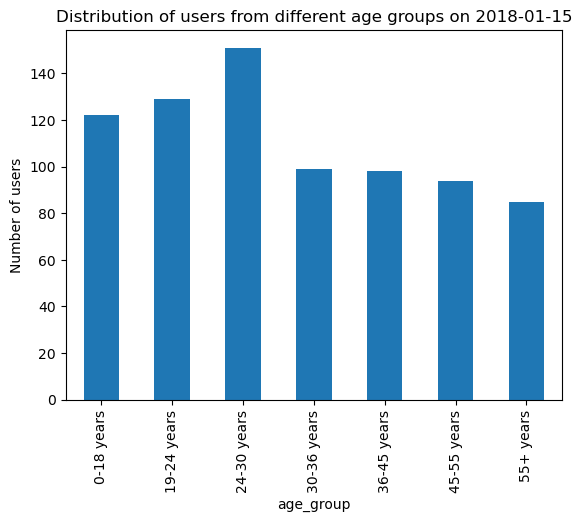

In [24]:
# converting the series back into a dataframe
eighteen_df = pd.DataFrame(eighteen_jan)

# plotting
# disabled the legend cuz it just shows the date of 2018-01-15
eighteen_df.plot(kind='bar', legend=False)

# labels
plt.title('Distribution of users from different age groups on 2018-01-15')
plt.ylabel('Number of users')

plt.show()

We can see that in the uptick, users <= 30 years responded better than the older age groups.